# Ridge Regression

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

Rozważmy następujący zbiór punktów:

In [111]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Zadanie 
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

In [112]:
plt.style.use('seaborn-white')

## Regresja liniowa

LR degree 2
LR degree 20


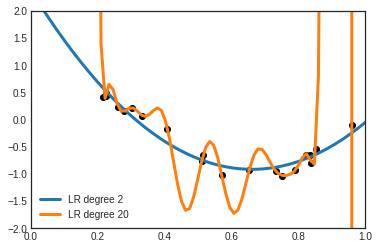

In [113]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 500))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
x_plot = np.vstack(np.linspace(-3, 3, 500))
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

## Regresja liniowa i Ridge regression dla wielomianu stopnia 20


In [114]:
model20 = make_pipeline(PolynomialFeatures(degree=20),linear_model.LinearRegression())
model20.fit(x,y)
metrics.r2_score(y,model20.predict(x))

0.99905760943393496

In [115]:
model20_rr = make_pipeline(PolynomialFeatures(degree=20),linear_model.Ridge(alpha=0.1))
model20_rr.fit(x,y)
metrics.r2_score(y,model20_rr.predict(x))

0.90048739233718511

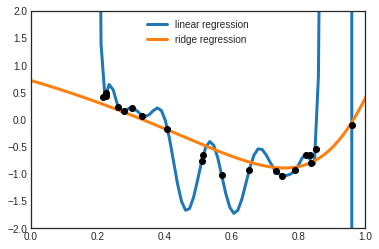

In [116]:
x_plt=np.linspace(-3,3,500)
plt.plot(x_plt,model20.predict(x_plt[:,np.newaxis]),label="linear regression",linewidth=3)
plt.plot(x_plt,model20_rr.predict(x_plt[:,np.newaxis]),label="ridge regression",linewidth=3)
plt.plot(x, y, 'ok');
plt.xlim((0,1))
plt.ylim((-2.0,2.0))
plt.legend()
plt.show()

# Zadanie 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2 
- regrsji wielomianowej stopnia 5 
- regrsji wielomianowej stopnia 25  
- regrsji Ridge wielomianowej stopnia 2 alpha=10.0
- regrsji Ridge wielomianowej stopnia 5 alpha=10.0
- regrsji Ridge wielomianowej stopnia 25 alpha=10.0 

oraz podaj uśrednione wartości dla każdej z nich oraz wykonaj barplot.

In [117]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))
models.append(('RR2', make_pipeline(PolynomialFeatures(2), linear_model.Ridge(0.1)) ))
models.append(('RR5', make_pipeline(PolynomialFeatures(5), linear_model.Ridge(0.1)) ))
models.append(('RR25', make_pipeline(PolynomialFeatures(25), linear_model.Ridge(0.1)) ))

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed)

In [119]:
results = []
names = []
print("Srednia (odchylenie standardowe) r2:")
for name, model in models:
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Srednia (odchylenie standardowe) r2:
LR: -10.902047 (9.149747)
PR2: -2.552525 (4.230624)
PR5: -3.848580 (8.470163)
PR25: -12039886543209902.000000 (24079766996477764.000000)
RR2: -12.216646 (10.641646)
RR5: -5.236971 (4.689385)
RR25: -4.185502 (5.311333)


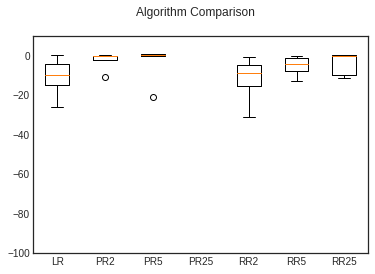

In [120]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylim([-100,10])
ax.set_xticklabels(names)
plt.show()

## Dobór optymalnego stopnia wielomianu i alpha dla Ridge regression

In [121]:
kf = model_selection.KFold(n_splits=5,shuffle=True)

In [127]:
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.Ridge()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7],
                    'ridge__alpha': [0.001,0.01,0.05,0.1, 0.2,0.5,1]},
                    cv=kf,
                    refit=True)
grid.fit(x, y)
grid.best_params_

{'polynomialfeatures__degree': 3, 'ridge__alpha': 0.001}

In [128]:
grid.best_score_

0.94713866772075117

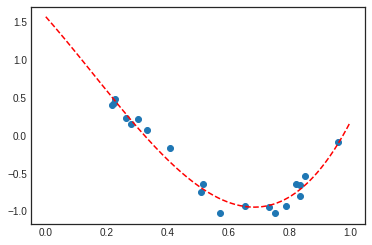

In [129]:
x_plt=np.linspace(0,1,500)
plt.scatter(x,y)
plt.plot(x_plt,grid.predict(x_plt[:,np.newaxis]),'r--',label="ridge_regression")

plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [130]:
import pandas as pd
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [177]:
# prepare models
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
#models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))
models.append(('RR2', make_pipeline(PolynomialFeatures(2), linear_model.Ridge(100)) ))
models.append(('RR5', make_pipeline(PolynomialFeatures(5), linear_model.Ridge(100)) ))
#models.append(('RR25', make_pipeline(PolynomialFeatures(25), linear_model.Ridge(0.1)) ))

seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed)

In [178]:
results = []
names = []
print("Srednia (odchylenie standardowe) r2:")
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Srednia (odchylenie standardowe) r2:
LR: 0.887106 (0.040341)
PR2: 0.984254 (0.012830)
PR5: 0.776311 (0.184534)
RR2: 0.984289 (0.012804)
RR5: 0.787635 (0.228435)


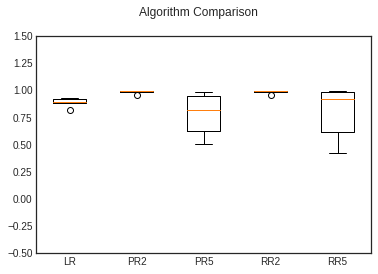

In [179]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylim([-0.5,1.5])
ax.set_xticklabels(names)
plt.show()

In [180]:
kf = model_selection.KFold(n_splits=5,shuffle=True)

In [201]:
grid_com = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2),linear_model.Ridge(alpha=0.1)),
                       param_grid={'polynomialfeatures__degree':[2,3,4],
                                  'ridge__alpha':[10,100,150,200,500,750,1000]},
                       cv=kf,
                       refit=True)

In [202]:
grid_com.fit(X,y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [2, 3, 4], 'ridge__alpha': [10, 100, 150, 200, 500, 750, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [203]:
grid_com.best_params_

{'polynomialfeatures__degree': 4, 'ridge__alpha': 200}

In [204]:
grid.best_score_

0.94713866772075117

In [205]:
df_adv["sales_pred"] = grid_com.predict(X)

In [206]:
df_adv.head(20)

,TV,radio,newspaper,sales,sales_pred
1,230.1,37.8,69.2,22.1,21.660668
2,44.5,39.3,45.1,10.4,11.109441
3,17.2,45.9,69.3,9.3,8.563090
4,151.5,41.3,58.5,18.5,18.308198
5,180.8,10.8,58.4,12.9,13.006197
6,8.7,48.9,75.0,7.2,7.471503
7,57.5,32.8,23.5,11.8,11.696557
8,120.2,19.6,11.6,13.2,13.032740
9,8.6,2.1,1.0,4.8,4.613711
10,199.8,2.6,21.2,10.6,11.201488
